In [2]:
 ! pip install -q kaggle

In [4]:
from google.colab import files

files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!kaggle datasets download -d ishitabhatt1/weapon-detection

Traceback (most recent call last):
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\2P\.kaggle. Or use the environment method.


In [7]:
! mkdir /weapon-detection
! unzip /content/weapon-detection.zip -d /weapon-detection

The syntax of the command is incorrect.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!kaggle datasets download -d muhammedaslan00/weapon-detection-datasett

Traceback (most recent call last):
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\2P\.kaggle. Or use the environment method.


In [9]:
!kaggle datasets download -d raghavnanjappan/weapon-dataset-for-yolov5
! mkdir /weapon-dataset-for-yolov5
! unzip /content/weapon-dataset-for-yolov5.zip -d /weapon-dataset-for-yolov5

Traceback (most recent call last):
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\2P\AppData\Local\Programs\Python\Python310\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\2P\.kaggle. Or use the environment method.
The syntax of the command is incorrect.
'unzip' is not recognized as an internal or external command,
operab

In [10]:
! mkdir /weapon-detection-datasett
! unzip /content/weapon-detection-datasett.zip -d /weapon-detection-datasett

The syntax of the command is incorrect.


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import cv2
import random
import os
from PIL import Image

import pandas as pd
from xml.dom import minidom
import csv

In [12]:
image_dir='/weapon-detection-datasett/Sohas_weapon-Detection/images'
annot_dir='/weapon-detection-datasett/Sohas_weapon-Detection/annotations/xmls'

In [13]:
import cv2
import numpy as np
def rescaling(path_image,targetSize,xmin,ymin,xmax,ymax):
    # imageToPredict = cv2.imread("img.jpg", 3)
    imageToPredict = cv2.imread(path_image, 3)

    # Note: flipped comparing to your original code!
    # x_ = imageToPredict.shape[0]
    # y_ = imageToPredict.shape[1]
    y_ = imageToPredict.shape[0]
    x_ = imageToPredict.shape[1]

    x_scale = targetSize / x_
    y_scale = targetSize / y_
    img = cv2.resize(imageToPredict, (targetSize, targetSize));
    img = np.array(img);

    # original frame as named values
    (origLeft, origTop, origRight, origBottom) = (xmin,ymin,xmax,ymax)

    xmin = int(np.round(origLeft * x_scale))
    ymin = int(np.round(origTop * y_scale))
    xmax = int(np.round(origRight * x_scale))
    ymax = int(np.round(origBottom * y_scale))
    # Box.drawBox([[1, 0, x, y, xmax, ymax]], img)
    #drawBox([[1, 0, xmin, ymin, xmax, ymax]], img)
    return img,xmin,ymin,xmax,ymax

In [14]:
def exteract_xml_contents(annot_directory,image_dir ,target_size=300):

    file=minidom.parse(annot_directory)

    #get the height and width of the image
    height,width=cv2.imread(image_dir).shape[:2]

    #get the bounding box

    xmin=file.getElementsByTagName('xmin')
    x1=float(xmin[0].firstChild.data)

    ymin=file.getElementsByTagName('ymin')
    y1=float(ymin[0].firstChild.data)

    xmax=file.getElementsByTagName('xmax')
    x2=float(xmax[0].firstChild.data)

    ymax=file.getElementsByTagName('ymax')
    y2=float(ymax[0].firstChild.data)

    class_name=file.getElementsByTagName('name')
    if class_name[0].firstChild.data=='knife':
        class_num=1
    else:
        class_num=0

    files=file.getElementsByTagName('filename')
    file_name=files[0].firstChild.data

    #return the exteracted attributes
    img,xmin,ymin,xmax,ymax=rescaling(image_dir,target_size,x1,y1,x2,y2)
    width=img.shape[0]
    height=img.shape[1]
    return file_name,width,height,class_num,xmin,ymin,xmax,ymax

In [15]:
def xml_to_csv(image_dir,annot_dir):
    #List containing all our attributes regarding each image

    xml_list=[]

    #get each files in the image and annotation  directory
    mat_files=os.listdir(annot_dir)
    img_files=os.listdir(image_dir)

    #loop over each of the image and its labels

    for i,image in enumerate(img_files):
        xp=image.split('.')
        mat_path=os.path.join(annot_dir,(str(xp[0])+'.xml'))
        img_path=os.path.join(image_dir,image)
        #get attributes for each image
        value=exteract_xml_contents(mat_path,img_path)

        xml_list.append(value)

    #columns for the pandas dataframe
    columns_name=['file_name','width','height','class_num',
                 'xmin','ymin','xmax','ymax']

    xml_df=pd.DataFrame(xml_list,columns=columns_name)

    #return the dataframe

    return xml_df

In [16]:
import os
train_labels_df=xml_to_csv(image_dir,annot_dir)
train_labels_df.to_csv(('dataset.csv'),index=None)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/weapon-detection-datasett/Sohas_weapon-Detection/annotations/xmls'

In [ ]:
train_labels_df

,file_name,width,height,class_num,xmin,ymin,xmax,ymax
0,billete_2112.jpg,300,300,0,22,76,278,264
1,billete_2084.jpg,300,300,0,30,39,213,214
2,LBmframe00145.jpg,300,300,1,130,132,144,159
3,LBmframe00187.jpg,300,300,1,221,141,239,169
4,LBbframe00382.jpg,300,300,1,172,137,185,182
...,...,...,...,...,...,...,...,...
817,billete_0181.jpg,300,300,0,132,141,156,169
818,billete_0058.jpg,300,300,0,57,138,244,203
819,KravMagaTraining21141.jpg,300,300,1,176,139,215,194
820,DefenseKnifeAttack1008.jpg,300,300,1,3,207,29,265


In [ ]:
class_list=sorted(['knife','no weapon'])

In [ ]:
def preprocess_dataset(image_dir,csv_file):
    #list that will contain the whole dataset

    labels =[]
    boxes =[]
    img_list=[]


    with open(csv_file) as csvfile:

        rows=csv.reader(csvfile)
        columns=next(iter(rows))
        none={}
        for i,row in enumerate(rows):

            img_path=row[0]
            full_path=os.path.join(image_dir,img_path)
            img=cv2.imread(full_path)
            if img is None:
                none[i]=str(full_path)
            else:
                img=cv2.imread(full_path)

                image=cv2.resize(img,(300,300))


                # Normalize the image by dividing it by 255.0
                image = image.astype("float") / 255.0

                # Append it to the list of images
                img_list.append(image)

                labels.append(int(row[3]))
                #scalling coordinates to the range of the [0,1] by dividing the cordinate by image size 1096 here
                arr=[float(row[4])/300,
                    float(row[5])/300,
                    float(row[6])/300,
                    float(row[7])/300]
                boxes.append(arr)


        return labels ,boxes,img_list,none

In [ ]:
train_labels,train_boxes,train_img,train_none=preprocess_dataset(image_dir,'dataset.csv')

In [ ]:
combined_list=list(zip(train_img,train_boxes,train_labels))
random.shuffle(combined_list)
#exteract back the content of each list
train_img,train_boxes,train_labels=zip(*combined_list)

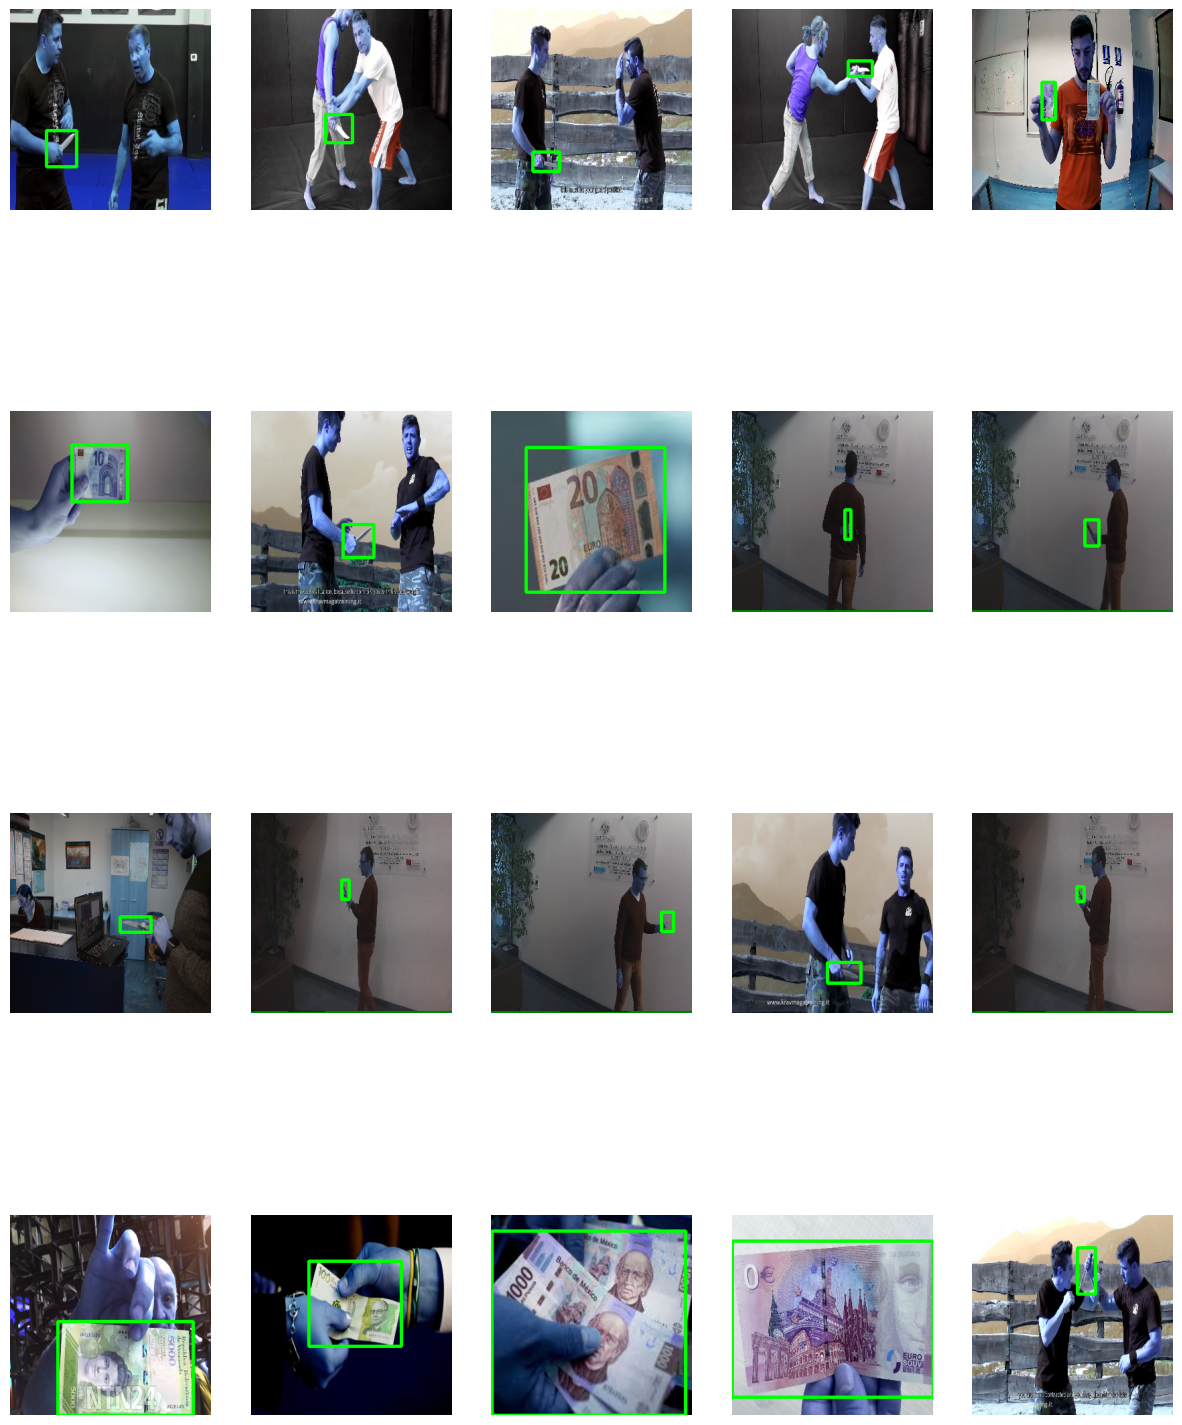

In [ ]:
# Create a Matplotlib figure
plt.figure(figsize=(15,20));

# Generate a random sample of images each time the cell is run
random_range = random.sample(range(1, len(train_img)), 20)

for itr, i in enumerate(random_range,1):

    # Bounding box of each image
    a1, b1, a2, b2 = train_boxes[i];
    img_size = 300

    # Rescaling the boundig box values to match the image size
    x1 = a1 * img_size
    x2 = a2 * img_size
    y1 = b1 * img_size
    y2 = b2 * img_size

    # The image to visualize
    image = train_img[i]

    # Draw bounding boxes on the image
    cv2.rectangle(image, (int(x1),int(y1)),
          (int(x2),int(y2)),
                  (0,255,0),
                  3);

    # Clip the values to 0-1 and draw the sample of images
    img = np.clip(train_img[i], 0, 1)
    plt.subplot(4, 5, itr);
    plt.imshow(img);
    plt.axis('off');

In [ ]:
# Split the data of images, labels and their annotations
train_images, val_images, train_labels,val_labels, train_boxes, val_boxes = train_test_split( np.array(train_img),
                np.array(train_labels), np.array(train_boxes), test_size = 0.1,random_state = 43)

print('Total Training Images: {}, Total Test Images: {}'.format(
    len(train_images),
    len(val_images)))

Total Training Images: 721, Total Test Images: 81


In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout
from tensorflow.keras.optimizers import SGD
image_size=300

In [ ]:
N_mobile = tf.keras.applications.NASNetMobile( input_tensor = Input(
    shape=(image_size, image_size, 3)),
    include_top=False,
    weights='imagenet')

19993432/19993432 [==============================] - 1s 0us/step


In [ ]:
def create_model(no_of_classes):

    # Freeze the whole model
    N_mobile.trainable = False
    base_model_output = N_mobile.output
    flattened_output = GlobalAveragePooling2D()(base_model_output)
    print(flattened_output.shape)
    class_prediction = Dense(256, activation="relu")(flattened_output)
    class_prediction = Dense(128, activation="relu")(class_prediction )
    class_prediction = Dropout(0.2)(class_prediction)
    class_prediction = Dense(64, activation="relu")(class_prediction)
    class_prediction = Dropout(0.2)(class_prediction )
    class_prediction = Dense(32, activation="relu")(class_prediction)
    class_prediction = Dense(no_of_classes, activation='softmax',name="class_output")(class_prediction)
    box_output = Dense(256, activation="relu")(flattened_output)
    box_output = Dense(128, activation="relu")(box_output)
    box_output = Dropout(0.2)(box_output )

    box_output = Dense(64, activation="relu")(box_output)
    box_output = Dropout(0.2)(box_output )

    box_output = Dense(32, activation="relu")(box_output)
    box_predictions = Dense(4, activation='sigmoid',
                            name= "box_output")(box_output)

    model = Model(inputs=N_mobile.input, outputs= [box_predictions, class_prediction])

    return model

In [ ]:
model = create_model(2)
model

(None, 1056)


In [ ]:
losses = {
    "box_output": "mean_squared_error",
    "class_output": "sparse_categorical_crossentropy"
    }
loss_weights = {
    "box_output": 1.0,
    "class_output": 1.0
    }

metrics = {
    'class_output': 'accuracy',
    'box_output':  'mse'
    }
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0.0001, patience = 40,
                    restore_best_weights = True
                     )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.0002,
                              patience = 30, min_lr = 1e-7, verbose = 1)

# Initialize Optimizer
opt = SGD(learning_rate = 1e-3, momentum = 0.9)

# Compile the model with Adam optimizer
model.compile(optimizer = opt, loss = losses, loss_weights = loss_weights,
    metrics = metrics)

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(x = train_images,
                      y= {
                          "box_output": train_boxes,
                          "class_output": train_labels
                          },
                      validation_data=(
                          val_images,
                          {
                            "box_output": val_boxes,
                            "class_output": val_labels
                            }), batch_size = 32, epochs = 5,
                      callbacks=[reduce_lr, stop])

Epoch 1/5
23/23 [==============================] - 188s 7s/step - loss: 0.6843 - box_output_loss: 0.0512 - class_output_loss: 0.6331 - box_output_mse: 0.0512 - class_output_accuracy: 0.6574 - val_loss: 0.5701 - val_box_output_loss: 0.0527 - val_class_output_loss: 0.5174 - val_box_output_mse: 0.0527 - val_class_output_accuracy: 0.7407 - lr: 0.0010
Epoch 2/5
23/23 [==============================] - 145s 6s/step - loss: 0.5388 - box_output_loss: 0.0502 - class_output_loss: 0.4886 - box_output_mse: 0.0502 - class_output_accuracy: 0.7559 - val_loss: 0.4950 - val_box_output_loss: 0.0517 - val_class_output_loss: 0.4433 - val_box_output_mse: 0.0517 - val_class_output_accuracy: 0.7407 - lr: 0.0010
Epoch 3/5
23/23 [==============================] - 146s 6s/step - loss: 0.4877 - box_output_loss: 0.0496 - class_output_loss: 0.4381 - box_output_mse: 0.0496 - class_output_accuracy: 0.7559 - val_loss: 0.4268 - val_box_output_loss: 0.0507 - val_class_output_loss: 0.3761 - val_box_output_mse: 0.0507 - 

In [ ]:
def plot(var1, var2, plot_name):
  # Get the loss metrics from the trained model
  c1 = history.history[var1]
  c2 = history.history[var2]

  epochs = range(len(c1)
                )

  # Plot the metrics
  plt.plot(epochs, c1, 'b', label=var1)
  plt.plot(epochs, c2, 'r', label=var2)
  plt.title(str(plot_name))
  plt.legend()

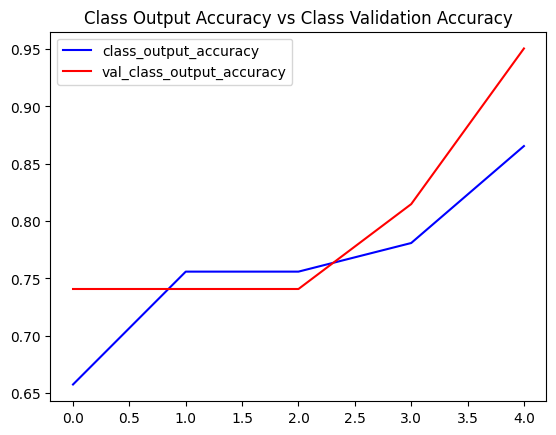

In [ ]:
plot( 'class_output_accuracy', 'val_class_output_accuracy', 'Class Output Accuracy vs Class Validation Accuracy')

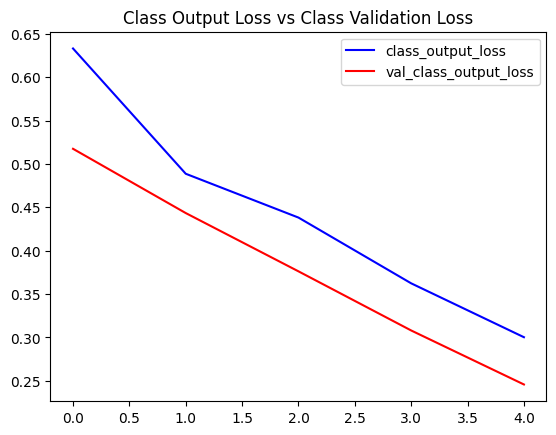

In [ ]:
plot( 'class_output_loss', 'val_class_output_loss', 'Class Output Loss vs Class Validation Loss')

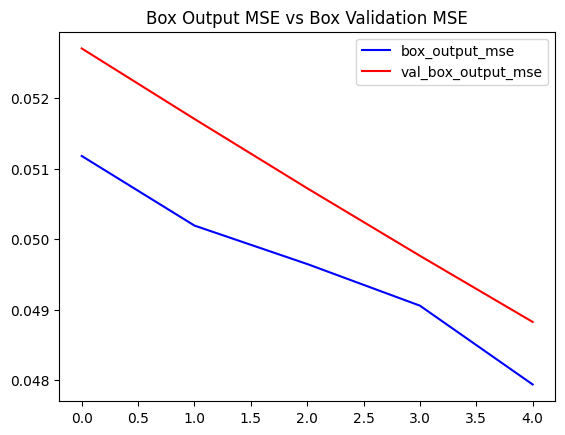

In [ ]:
plot( 'box_output_mse', 'val_box_output_mse', 'Box Output MSE vs Box Validation MSE')

In [ ]:
#Save your model here in .h5 format.
model.save('caltech_normal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
global label_names

# Must be same as the Annotations list we used
label_names = sorted(class_list)

In [ ]:
def predict(image, returnimage = False,  scale = 0.9):

  processed_image = preprocess(image)
  results = model.predict(processed_image)

  label, (x1, y1, x2, y2), confidence = postprocess(image, results)
  cv2.rectangle(image, (x1,y1), (x2,y2), (0, 255, 100), 2)
  cv2.putText(
      image,
      '{}'.format(label, confidence),
      (x1, y2+(50)),
      cv2.FONT_HERSHEY_COMPLEX, scale,
      (200, 300, 100),2)


  # Show the Image with matplotlib
  plt.figure(figsize=(10,10))
  plt.imshow(image[:,:,::-1])

In [ ]:
def preprocess(img, image_size = 300):

    image = cv2.resize(img, (image_size, image_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype("float") / 255.0
    # Expand dimensions as predict expect image in batches
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
def postprocess(image, results):

    # Split the results into class probabilities and box coordinates
    bounding_box, class_probs = results
    class_index = np.argmax(class_probs)

    # Use this index to get the class name.
    class_label = label_names[class_index]

    h, w = image.shape[:2]

    # Extract the Coordinates
    x1, y1, x2, y2 = bounding_box[0]

    # Convert the coordinates from relative (i.e. 0-1) to actual values
    x1 = int(w * x1)
    x2 = int(w * x2)
    y1 = int(h * y1)
    y2 = int(h * y2)

    # return the lable and coordinates
    return class_label, (x1,y1,x2,y2),class_probs